# 5. Finance Fundamentals

Overview of contents:
- 5.1 Portfolio and Shape Ratio
- 5.2 Portfolio Optimization
- 5.3 Financial Tools and Concepts
- 5.4 CAMP Model

## 5.4 CAPM Model = Capital Assets Pricing Model

- One of the most fundamental models in investing
- A portfolio is a set of weighted securities which yield a return
- The return of a portfolio is then:

$r_p(t) = \sum_{i}^{n} w_i r_i(t)$

- We can imagine the entire market as a portfolio, for example the S&P500; then, the company weights would be

$w_i = \frac{MarketCap_i}{\sum_j^n MarketCap_j}$

- The market cap of a company is `num_shares * price_share`
- The CAPM model describes the linear relationship between the returns of a stock and the market

$r_i(t) = \beta_i r_m(t) + \alpha_i(t)$

- If we have a scatterplot with the daily returns of the market and a the ones of a stock, the line that fits in the plot has the `beta` and `alpha` coefficients.
- CAPM says
    - `beta` is the multiplication/scaling of the market return in our stock
    - `alpha` is a residual term that will be tend to be 0; in fact, CAMPM states that `alpha` is random and cannot be predicted
- However, we are going to behave like active investors and are going to believe that we are able to modify/predict `alpha` values
- Therefore, if we take the `beta` of our portfolio and the individual `alpha` values of the stocks, the CAPM could be re-written as

$r_p(t) = \beta_p r_m(t) + \sum_{i}^{n} w_i \alpha_i(t)$



In [7]:
from scipy import stats
import pandas as pd
import pandas_datareader as web

In [17]:
# We get the SPIDER ETF, which tracks the entire S&P500
# That is our market series
spy_etf = web.DataReader('SPY','yahoo')

In [18]:
# We have a look at where it starts and ends
# To grab the same period for selected stocks
spy_etf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-04-27,209.809998,208.050003,208.470001,209.350006,77329400.0,190.433411
2016-04-28,209.759995,206.960007,208.460007,207.449997,97216200.0,188.705063
2016-04-29,207.130005,205.029999,206.720001,206.330002,142424100.0,187.686279
2016-05-02,208.179993,206.410004,206.919998,207.970001,62188000.0,189.178101
2016-05-03,206.800003,205.279999,206.520004,206.160004,106422100.0,187.531647


In [19]:
spy_etf.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-19,416.739990,413.790009,416.260010,415.209991,78498500.0,415.209991
2021-04-20,415.089996,410.589996,413.910004,412.170013,81851800.0,412.170013
2021-04-21,416.290009,411.359985,411.510010,416.070007,66793000.0,416.070007
2021-04-22,416.779999,411.130005,415.890015,412.269989,97582800.0,412.269989
2021-04-23,418.250000,412.790009,412.869995,416.739990,73209200.0,416.739990


In [20]:
start = pd.to_datetime('2016-04-27')
end = pd.to_datetime('2021-04-23')

In [21]:
aapl = web.DataReader('AAPL','yahoo',start,end)

In [22]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-04-27,24.677500,23.920000,24.000000,24.455000,458408400.0,22.745811
2016-04-28,24.469999,23.562500,24.402500,23.707500,328970800.0,22.050558
2016-04-29,23.680000,23.127501,23.497499,23.434999,274126000.0,21.797100
2016-05-02,23.520000,23.100000,23.492500,23.410000,192640400.0,21.773848
2016-05-03,23.934999,23.420000,23.549999,23.795000,227325200.0,22.131937


In [23]:
import matplotlib.pyplot as plt

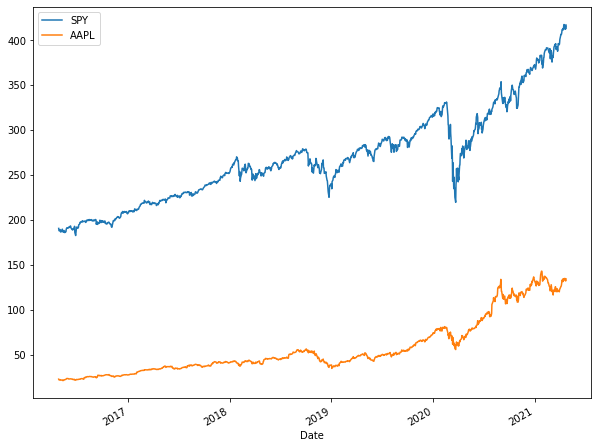

In [29]:
# We plot both market and stock
spy_etf['Adj Close'].plot(figsize=(10,8),label='SPY')
aapl['Adj Close'].plot(figsize=(10,8),label='AAPL')
plt.legend()

In [30]:
# Cumulative returns for every day
spy_etf['Cumulative Return'] = spy_etf['Adj Close']/spy_etf['Adj Close'].iloc[0]
aapl['Cumulative Return'] = aapl['Adj Close']/aapl['Adj Close'].iloc[0]

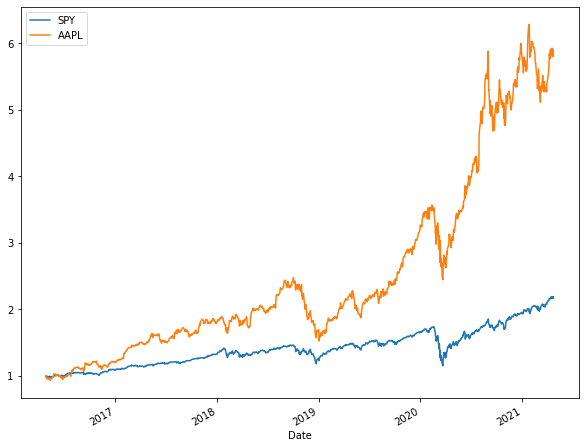

In [31]:
# Plot cumulative return
spy_etf['Cumulative Return'].plot(figsize=(10,8),label='SPY')
aapl['Cumulative Return'].plot(figsize=(10,8),label='AAPL')
plt.legend()

In [32]:
# Daily return
spy_etf['Daily Return'] = spy_etf['Adj Close'].pct_change(1)
aapl['Daily Return'] = aapl['Adj Close'].pct_change(1)

Text(0, 0.5, 'AAPL daily return')

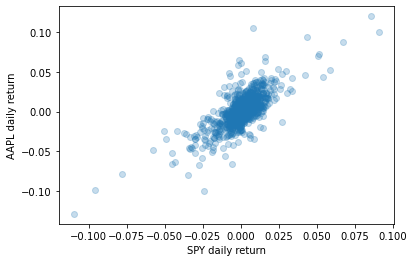

In [58]:
# Plot daily return: SCATTERPLOT
plt.scatter(spy_etf['Daily Return'],aapl['Daily Return'],alpha=0.25)
plt.xlabel('SPY daily return')
plt.ylabel('AAPL daily return')

In [43]:
# Compute alpha and beta values with linear regression
result = stats.linregress(x=spy_etf['Daily Return'].iloc[1:],y=aapl['Daily Return'].iloc[1:])

In [44]:
result

LinregressResult(slope=1.2109202635243175, intercept=0.0007560023285205499, rvalue=0.7513930545477042, pvalue=1.1612225635329088e-228, stderr=0.0300294959426919, intercept_stderr=0.0003555869065306641)

In [45]:
# We unpack the result values
# Slope: beta
# Intercept: alpha
beta,alpha,r_value,p_value,std_err = result

In [46]:
# Every market move is scaled with beta to yield our stock moves
beta

1.2109202635243175

In [50]:
# According to CAPM, alpha -> 0
# We see it is not really 0, but it has some residual value
# Even small alpha values can mean a difference:
# that is the return offset we have wrt market
alpha

0.0007560023285205499

In [51]:
r_value

0.7513930545477042

In [68]:
p_value

1.1612225635329088e-228

In [ ]:
# It is important to be aware of the R^2 and p values of the regression
# as well as the mean and std. dev. values of our returns

In [70]:
spy_etf['Daily Return'].describe()

count    1256.000000
mean        0.000694
std         0.011826
min        -0.109424
25%        -0.002852
50%         0.000733
75%         0.005519
max         0.090603
Name: Daily Return, dtype: float64

In [71]:
# AAPL (stock) has larger mean and std. dev. than SPY (market)
aapl['Daily Return'].describe()

count    1256.000000
mean        0.001596
std         0.019058
min        -0.128647
25%        -0.006201
50%         0.001119
75%         0.010262
max         0.119808
Name: Daily Return, dtype: float64

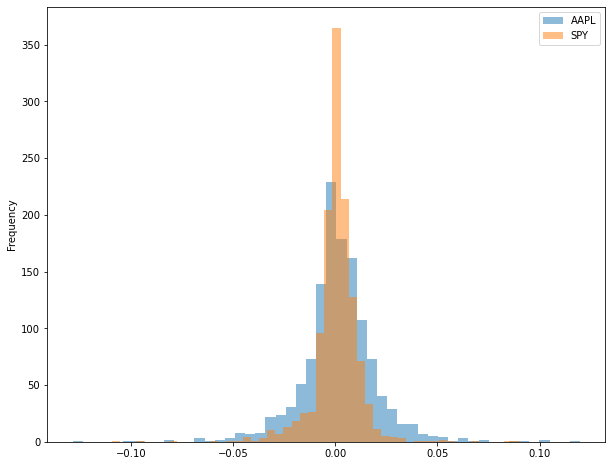

In [75]:
# We should also plot overlapping histograms
# We see the stock (AAPL) profile is fatter/wider
aapl['Daily Return'].plot(kind='hist',figsize=(10,8),label='AAPL',bins=50,alpha=0.5)
spy_etf['Daily Return'].plot(kind='hist',figsize=(10,8),label='SPY',bins=50,alpha=0.5)
plt.legend()